<a href="https://colab.research.google.com/github/LeadShadow/hw6_data_science/blob/main/Hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 731.6 kB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=0acf74f954e8d1ac1ac7429abd3150afc4fd20246fe26eba941d722bbce528a5
  Stored in directory: /root/.cache/pip/wheels/b1/59/a0/a1a0624b5e865fd389919c1a10f53aec9b12195d6747710baf
Successfully built pyspark


# Завдання 1

In [4]:
import random
from pyspark.sql.functions import udf
from pyspark.sql import Row
from pyspark.sql import SparkSession
import seaborn as sns
from pyspark.sql.functions import mean, stddev, round as _round

1 Створити спарк сесію

In [5]:
spark_session = SparkSession.builder.getOrCreate()

2 Прочитать датасет в датафрейм.

In [7]:
users_df = spark_session.read.csv('bestsellers with categories.csv', header=True)
users_df.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

3 Используя только RDD вычислить среднюю цену всех книг, у которых рейтинг выше 4.7

In [8]:
users_df.filter(users_df['User Rating'] > 4.7).agg({'Price': 'mean'}).show()

+-----------------+
|       avg(Price)|
+-----------------+
|10.69832402234637|
+-----------------+



4 Построить гистограмму распределения рецензий (столбец Reviews).

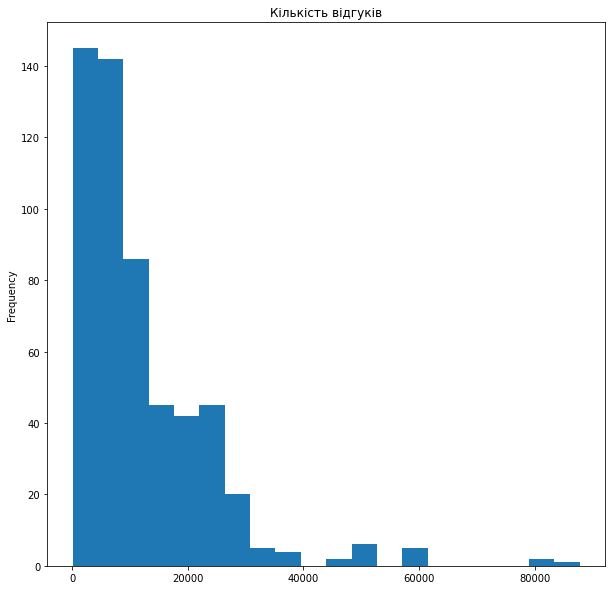

In [9]:
import matplotlib.pyplot as plt

books_pd = users_df.toPandas()
books_pd['Reviews'] = books_pd['Reviews'].astype(int)
books_pd['Reviews'].plot(kind='hist', bins=20, figsize=(10, 10))
plt.title('Кількість відгуків')
plt.show()

5 Построить матрицу корреляции для столбцов "User Rating", "Reviews" и "Price".

In [10]:
books_pd['User Rating'] = books_pd['User Rating'].astype(float)
books_pd['Price'] = books_pd['Price'].astype(int)
cor = books_pd.loc[:, ['User Rating', 'Reviews', 'Price']].corr()
cor

,User Rating,Reviews,Price
User Rating,1.000000,-0.001729,-0.133086
Reviews,-0.001729,1.000000,-0.109182
Price,-0.133086,-0.109182,1.000000


6 Используя библиотеку seaborn построить парные графики (pairplots) столбцов "User Rating", "Reviews" и "Price".

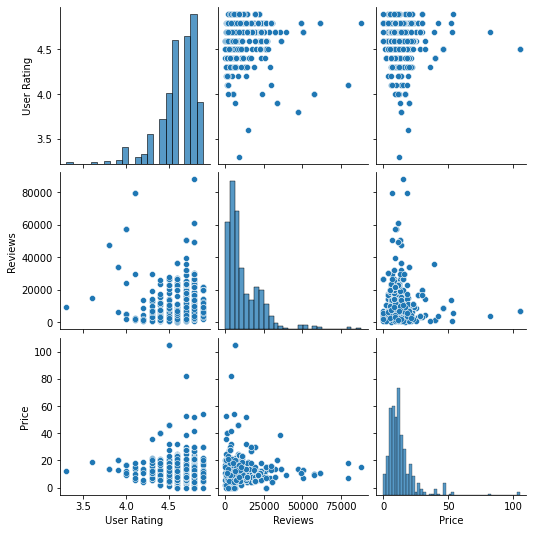

In [11]:
sns.pairplot((books_pd.loc[:, ['User Rating', 'Reviews', 'Price']]))

# Завдання 2

1 Найдите автора с самым высоким рейтингом.

In [12]:
users_df.withColumnRenamed('User Rating', 'User_Rating').createOrReplaceTempView('Books')
spark_session.sql('Select * From Books').show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User_Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

In [13]:
spark_session.sql('Select Author, avg(User_Rating) as avg_rat From Books Group By Author Order By avg_rat DESC Limit 1').show()

+----------+-------+
|    Author|avg_rat|
+----------+-------+
|Jill Twiss|    4.9|
+----------+-------+



2 Найдите трех авторов с самым низким рейтингом.

In [14]:
spark_session.sql('Select Author, avg(User_Rating) as avg_rat From Books Group By Author Order By avg_rat Limit 3').show()

+--------------+-------+
|        Author|avg_rat|
+--------------+-------+
|   Donna Tartt|    3.9|
| Gillian Flynn|    4.0|
|Muriel Barbery|    4.0|
+--------------+-------+



3 Определите какой автор получил наибольшее количество рецензий.

In [15]:
spark_session.sql('Select Author, sum(Reviews) as rev From Books Group By Author Order By rev DESC Limit 1').show()

+---------------+--------+
|         Author|     rev|
+---------------+--------+
|Suzanne Collins|278329.0|
+---------------+--------+



4 Определите какой автор написал наибольшее количество книг за весь доступный в данных период.

In [16]:
spark_session.sql('Select Author, count(Author) as books From Books Group By Author Order By books desc Limit 1').show()

+-----------+-----+
|     Author|books|
+-----------+-----+
|Jeff Kinney|   12|
+-----------+-----+



5 Визначте, яка книга жанру "Fiction" має найменший рейтинг.

In [18]:
spark_session.sql('Select Name, User_Rating From Books Where Genre = "Fiction" Order By User_Rating Limit 1').show()

+------------------+-----------+
|              Name|User_Rating|
+------------------+-----------+
|The Casual Vacancy|        3.3|
+------------------+-----------+



6 Визначте, яка книга жанру "Non Fiction" має найвищий рейтинг.

In [20]:
spark_session.sql('Select Name, User_Rating From Books Where Genre = "Non Fiction" Order By User_Rating Limit 1').show()

+-------------------+-----------+
|               Name|User_Rating|
+-------------------+-----------+
|StrengthsFinder 2.0|          4|
+-------------------+-----------+



# Завдання 3


Побудуйте гістограму середньої кількості рецензій за роками. У вигляді окремої гістограми візуалізуйте кількість книг жанру "Fiction" та "Non Fiction" за весь доступний період.

In [21]:
books = users_df.groupBy('Year').agg({'Reviews': 'mean'}).orderBy('Year').toPandas()

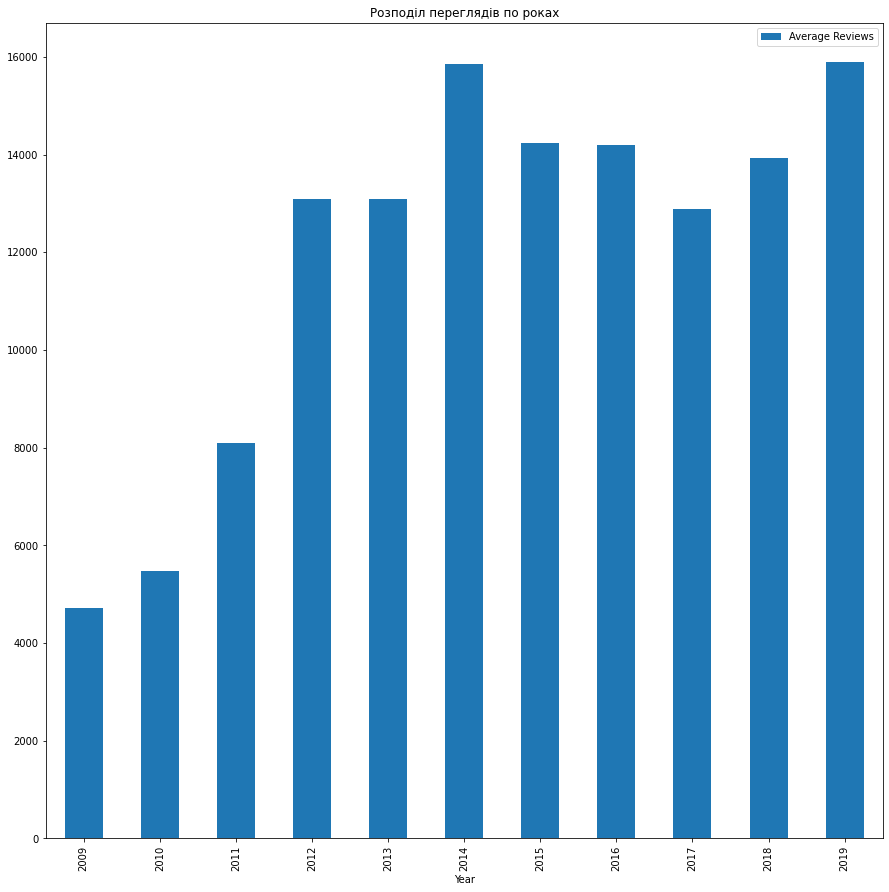

In [24]:
books.plot(kind='bar', x='Year', y='avg(Reviews)', figsize=(15, 15), label='Average Reviews')
plt.title('Розподіл переглядів по роках')
plt.show()